<a href="https://www.kaggle.com/code/clemwo/top-1k-tech-companies-eda?scriptVersionId=194112765" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
        
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/top-1000-global-tech-companies-dataset-2024/Top 1000 technology companies.csv


<img src="https://cdn-jnhfd.nitrocdn.com/kgxqMWAUDbOzXHmWLhNfrDJbkRgJVaSo/assets/images/optimized/rev-8f2412b/www.thomsondata.com/blog/wp-content/uploads/2022/11/Top-Tech-Companies-in-the-World-2.jpg" alt="Tech Companies" width="1000"/>


# 🏢 Top 1k Tech Companies 📊 EDA 

Exploratory data analysis on Kaggles [Top 100 Global Tech Companies Dataset 2024](https://www.kaggle.com/datasets/muhammadehsan000/top-1000-global-tech-companies-dataset-2024/data) dataset. The dataset contains the following columns

| Column | Description | 
| ------ | ----------- | 
| `Ranking`    | Worldwide ranking | 
| `Company`    | Company or firm name | 
| `Market Cap` | Representing the total market value of its outstanding shares of stock | 
| `Stock`      | Ticker symbol for stock exchange identification | 
| `Country`    | Headquarters location of the company | 
| `Sector`     | Broad category – but all companies here belong to the Technology sector | 
| `Industry`   | Specific focus within the Technology sector | 

In [2]:
tech = pd.read_csv('/kaggle/input/top-1000-global-tech-companies-dataset-2024/Top 1000 technology companies.csv')
print(f"Rows: {tech.shape[0]:,}")
print(f"Cols: {tech.shape[1]:,}")
print(tech.dtypes)
tech.head(10)

Rows: 1,000
Cols: 7
Ranking        int64
Company       object
Market Cap    object
Stock         object
Country       object
Sector        object
Industry      object
dtype: object


,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors
5,6,"Samsung Electronics Co., Ltd.",$392.38 B,005930,South Korea,Technology,Consumer Electronics
6,7,ASML Holding N.V.,$297.10 B,ASML,Netherlands,Technology,Semiconductor Equipment & Materials
7,8,Oracle Corporation,$282.01 B,ORCL,United States,Technology,Software—Infrastructure
8,9,Adobe Inc.,$260.23 B,ADBE,United States,Technology,Software—Infrastructure
9,10,"salesforce.com, inc.",$243.78 B,CRM,United States,Technology,Software—Application


# 🗺️ Investigating the Countries

In this section we are going to investigate distributions per `Country`, independent of a single company.

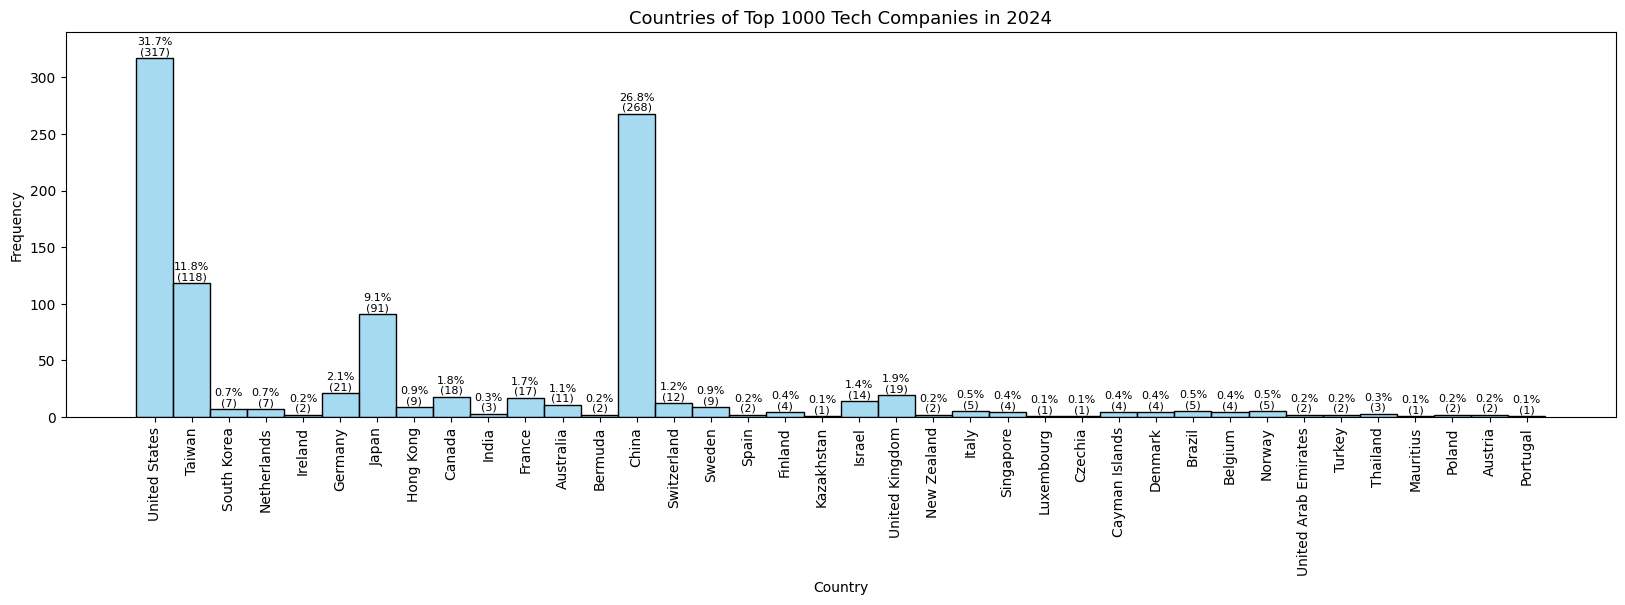

In [35]:
# --------- #
# Preparing #
# --------- #

country_counts = tech['Country'].value_counts()
country_percentages = 100 * (country_counts / country_counts.sum())


# -------- #
# Plotting #
# -------- #

plt.figure(figsize=(20, 5))
ax = sns.histplot(data=tech, x='Country', color='skyblue', edgecolor='black', linewidth=1)
plt.ylim((0, 340))

for p in ax.patches:
    height = p.get_height()
    percentage = (height / country_counts.sum()) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 10, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'({int(height)})', ha='center', va='bottom', fontsize=8)

plt.title('Countries of Top 1000 Tech Companies in 2024', fontsize=13)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

- The top 5 countries with the most top 1000 companies are: US 🇺🇸, China 🇨🇳, Taiwan 🇹🇼, Japan 🇯🇵, United Kingdom 🇬🇧.
- Nearly every third company from the top 1000 comes from the US 🇺🇸.
- 27% of all companies are out of China 🇨🇳.
- Every 10th company comes from from Taiwan 🇹🇼.
- Companies with only a single top 1000 company are: Kazakhstan 🇰🇿, Czech Republic 🇨🇿, Luxembourg 🇱🇺, Mauritius 🇲🇺, Portugal 🇵🇹.

## 💰 Market Caps per Country

In this section we are going to take a look at the overall market cap for all companies of each country. In the following we are trying to answer the question: _If we sum up the market caps of all companies of each country, how much does each country account of the overall market cap of all the 1000 companies?_

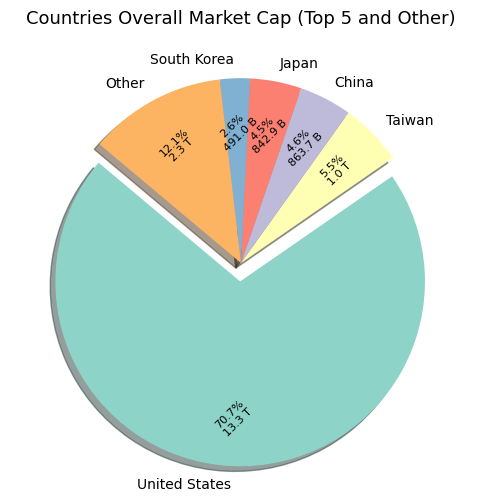

In [36]:
TOP_N = 5

def convert_market_cap(market_cap_str):
    """Convert 'Market Cap' to numeric by stripping the dollar signs, commas, and converting T to trillions."""
    if 'B' in market_cap_str:
        return float(market_cap_str.replace(' B', '').replace('$', '').replace(',', '')) * 1e9
    elif 'T' in market_cap_str:
        return float(market_cap_str.replace(' T', '').replace('$', '').replace(',', '')) * 1e12
    elif 'M' in market_cap_str:
        return float(market_cap_str.replace(' M', '').replace('$', '').replace(',', '')) * 1e6
    else:
        return float(market_cap_str.replace('$', '').replace(',', ''))


# --------- #
# Preparing #
# --------- #

tech['Market Cap Numeric'] = tech['Market Cap'].apply(convert_market_cap)
market_cap_by_country = tech.groupby('Country')['Market Cap Numeric'].sum()
top_n_by_country = market_cap_by_country.nlargest(TOP_N)
other = market_cap_by_country.nlargest(len(market_cap_by_country) - TOP_N).sum() - top_n_by_country.sum()
top_n_by_country['Other'] = other

# -------- #
# Plotting #
# -------- #
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    top_n_by_country, 
    labels=top_n_by_country.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('Set3', len(top_n_by_country)),
    explode=[0.1] + [0] * (len(top_n_by_country) - 1),
    shadow=True
)

for i, autotext in enumerate(autotexts):
    market_cap = top_n_by_country[i]
    if market_cap >= 1e12: cap_text = f'\n{market_cap / 1e12:.1f} T'
    else: cap_text = f'\n{market_cap / 1e9:.1f} B'
    
    autotext.set_text(autotext.get_text() + cap_text)
    autotext.set_rotation(45)
    autotext.set_color('black')
    autotext.set_fontsize(8)
    autotext.set_position([1.2 * autotext.get_position()[0], 1.2 * autotext.get_position()[1]])    

plt.title(f'Countries Overall Market Cap (Top {TOP_N} and Other)', fontsize=13)
plt.show()

> US 🇺🇸 companies alone account for two third of the overall market cap of the top 1000 companies.

- All non-Top 5 countries together (`Other`) only account for 12% (2.3 T) of the overall market cap of the top 1000 companies. 
- In other words, __90% of the total market cap of the top 1000 companies comes from just five countries__. 👀

# 🏢Investigating the Sectors

In this section we are going to investigate the `Sector`s of the top 1000 companies. 

In [5]:
tech['Sector'].value_counts()

Sector
Technology    1000
Name: count, dtype: int64

Literally every company in the top 1000 countries is a technology company. I guess there is not much more to analyse here 😆.

# 🏭 Investigating the Industries

In this section we are going to investigate the `Industries` of the top 1000 companies.

In [6]:
def format_market_cap(value):
    if value >= 1e12:
        return f'{value / 1e12:.1f} T'
    elif value >= 1e9:
        return f'{value / 1e9:.1f} B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f} M'
    else:
        return f'{value:.1f}'

In [7]:
print("Industries by Market Share & Market Cap")
print("=======================================")

# --- Add market share information ---
industry_share = tech['Industry'].value_counts()
industry_share_percentage = 100 * tech['Industry'].value_counts(normalize=True)
industry_df = pd.DataFrame({
    'Industry': industry_share.index,
    'Count': industry_share.values,
    'Share (%)': industry_share_percentage.values,
})
industry_df['Cumulative Share (%)'] = industry_df['Share (%)'].cumsum()

# --- Add market cap information ---
industry_market_cap = tech.groupby('Industry')['Market Cap Numeric'].sum()
industry_df['Total Market Cap'] =  industry_market_cap[industry_share.index].values
industry_df['Total Market Cap'] = industry_df['Total Market Cap'].apply(format_market_cap)

industry_df['Rank (Total Market Cap)'] = industry_market_cap.rank(ascending=False).astype(int).reindex(industry_share.index).values
industry_df['Rank (Count)'] = industry_df['Count'].rank(ascending=False).astype(int)
industry_df['Delta Rank'] = industry_df['Rank (Count)'] - industry_df['Rank (Total Market Cap)']

industry_df

Industries by Market Share & Market Cap


,Industry,Count,Share (%),Cumulative Share (%),Total Market Cap,Rank (Total Market Cap),Rank (Count),Delta Rank
0,Software—Application,198,19.8,19.8,2.4 T,4,1,-3
1,Semiconductors,135,13.5,33.3,4.1 T,2,2,0
2,Information Technology Services,129,12.9,46.2,1.4 T,5,3,-2
3,Electronic Components,122,12.2,58.4,588.6 B,7,4,-3
4,Software—Infrastructure,104,10.4,68.8,4.3 T,1,5,4
5,Semiconductor Equipment & Materials,70,7.0,75.8,965.5 B,6,6,0
6,Communication Equipment,69,6.9,82.7,560.2 B,8,7,-1
7,Computer Hardware,60,6.0,88.7,471.5 B,9,8,-1
8,Scientific & Technical Instruments,49,4.9,93.6,382.6 B,10,9,-1
9,Consumer Electronics,34,3.4,97.0,3.5 T,3,10,7


__Description of the columns__

| Column | Description |
| ------ | ----------- |
| `Count` | Number of companies in that `Industry`. | 
| `Share (%)` | `Count/Sum(Count)`: The share of each industry out of all the top 1000 companies. | 
| `Cumulative Share (%)` | Cumulative share from industry with the highest count to industry with the lowest. | 
| `Total Market Cap` | Total market capitalization of that industry. | 
| `Rank (Total Market Cap)` | Rank of the industry when ordering by `Total Market Cap`. | 
| `Rank (Count)` | Rank of the industry when ordering by `Count`. | 
| `Delta Rank` | Difference between the `Rank (Count)` and `Rank (Total Market Cap)`. | 

__Observations__
- `Count`, `Share (%)`, `Cumulative Share (%)`:
    - 💻 Every 5th company works in the `Software Application` industry.
    - 🥑 The top 3 industries `Software Application`, `Semiconductors` and `Information Technology Services` already account for nearly 50% of all companies.
- `Total Market Cap`, `Rank (Total Market Cap)`:
    - 🥇 If we order by the total market capitalization of each industry the industry `Electronic Components` ranks highest with a total market cap of 4.3 Trillion.
    - 🥉 `Consumer Electronics` industry ranks 3rd when ordering by total market cap.
- `Delta Rank`:
    - 🚨 We see that __the industries with the most companies _are not necessarily_ the industries with the highest total market cap__!
    - 🔎 The industry with the __highest positive discrepancy__ in the rank of it's count versus the rank of it's total market cap is `Consumer Electronics`. It has a rank discrepancy of 7, which means, it's rank when looking at the total market cap is __7 places higher__ than it's rank when looking at the count of companies in that industry. 
    - 👀 The industries with the __highest negative rank discrepancy__ are `Software Application` and `Electronic Components`. Both have a market cap rank which is __3 places higher__ than their rank by company count. 
    
__Conclusion__

> Industries like `Software—Application` and `Electronic Components` which have the highest negative rank discrepancy are industries in which __less companies account for significantly more market cap__.
>
> Industry like `Consumer Electronics` which has the highest positive rank discrepancy is an industry which __has a lot of companies which account of relatively low total market cap__.

Let's take a look at each industry separately and visualize the distribution of market caps for each industry.

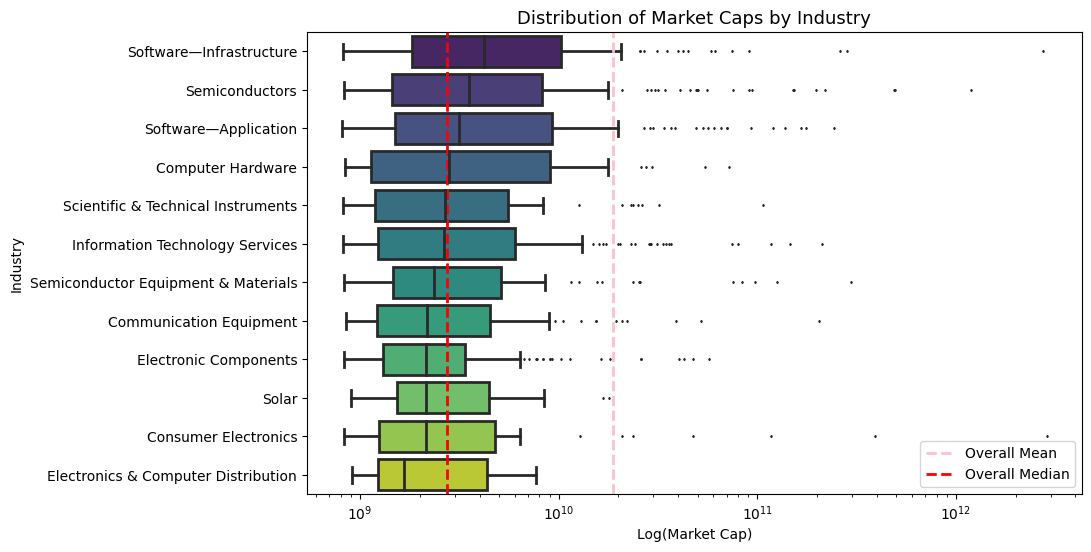

In [40]:
# --------- #
# Preparing #
# --------- #

industry_order = tech.groupby('Industry')['Market Cap Numeric'].median().sort_values(ascending=False).index

overall_mean = tech['Market Cap Numeric'].mean()
overall_median = tech['Market Cap Numeric'].median()


# -------- #
# Plotting #
# -------- #

plt.figure(figsize=(10, 6))
sns.boxplot(x='Market Cap Numeric', y='Industry', data=tech, order=industry_order, 
            palette='viridis', fliersize=1, linewidth=2.0)

plt.axvline(overall_mean, color='pink', linestyle='--', lw=2.0, label=f'Overall Mean')
plt.axvline(overall_median, color='red', linestyle='--', lw=2.0, label=f'Overall Median')

plt.title('Distribution of Market Caps by Industry', fontsize=13)
plt.xlabel('Log(Market Cap)')
plt.ylabel('Industry')
plt.xscale('log')  # Logarithmic scale for better visualization of large market cap differences.
plt.legend()

plt.show()

- Due to some immense outliers the `Overall Mean` is massively larger than the `Overall Median`
- The median market cap for each industry does not fluctuate strongly around the `Overall Median`.

# 🆚 Country vs Industry

The objective of this section is to understand the distribution of companies across countries and industries.

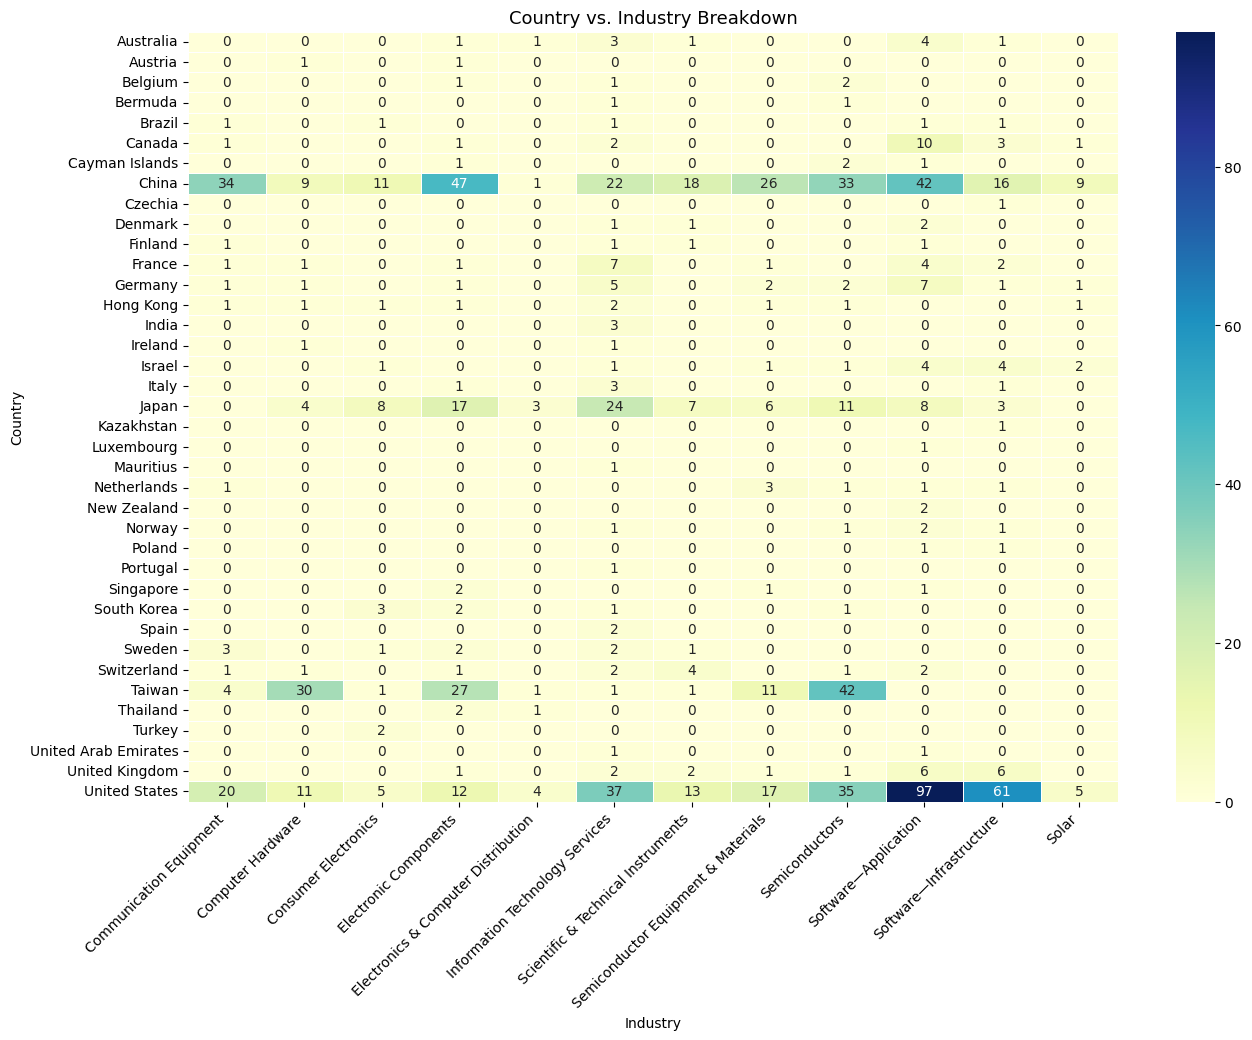

In [48]:
sector_industry_ct = pd.crosstab(tech['Country'], tech['Industry'])

plt.figure(figsize=(15, 10))
sns.heatmap(sector_industry_ct, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Country vs. Industry Breakdown', fontsize=13)
plt.ylabel('Country')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.show()

The above shows a frequency table (cross-tabulation) that shows the number of companies for each country and industry combination.

# 💪 Ranking and Performance

The objective of this section is to explore the relationship between ranking and other variables like market cap.

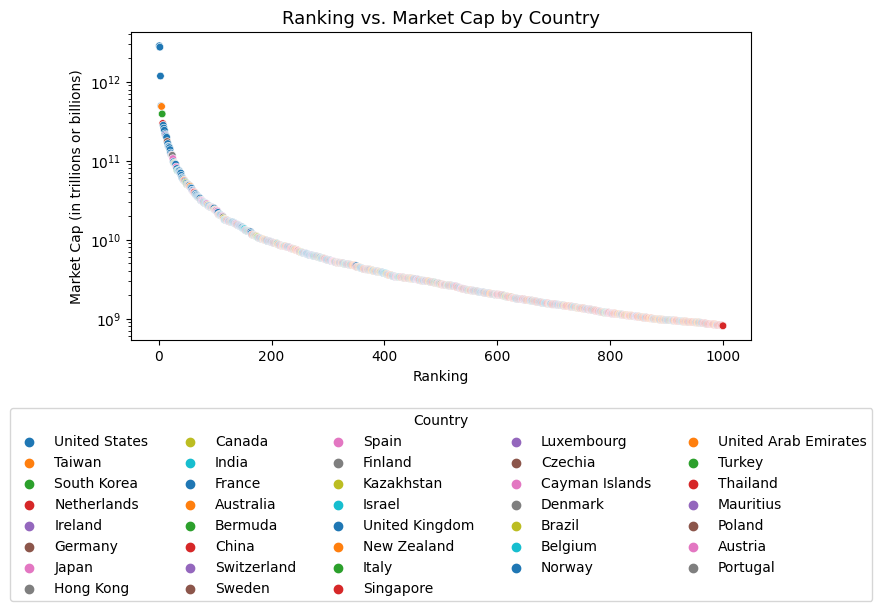

In [60]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=tech, x='Ranking', y='Market Cap Numeric', hue='Country', palette='tab10', s=30)
plt.title('Ranking vs. Market Cap by Country', fontsize=13)
plt.xlabel('Ranking')
plt.ylabel('Market Cap (in trillions or billions)')
plt.yscale('log')  # Use logarithmic scale if market caps vary greatly
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

plt.show()

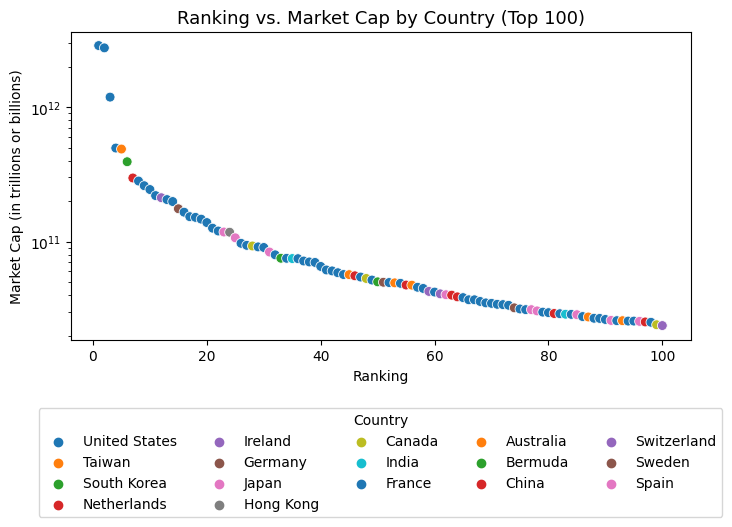

In [59]:
TOP_N = 100
top_ranked = tech[tech['Ranking'] <= TOP_N]

plt.figure(figsize=(8, 4))
sns.scatterplot(data=top_ranked, x='Ranking', y='Market Cap Numeric', hue='Country', palette='tab10', s=50)
plt.title(f'Ranking vs. Market Cap by Country (Top {TOP_N})', fontsize=13)
plt.xlabel('Ranking')
plt.ylabel('Market Cap (in trillions or billions)')
plt.yscale('log')
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

plt.show()

---


💚 Thank you for reading 💚

If you have any questions or feedback, feel free to leave a comment 🤔

This notebook is __still in progress__.

Please __UPVOTE__ if you enjoyed this notebook 🙏